# ***IMPORTS***

---



In [428]:
#data processing and visualization
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
 

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError


#scikit-learn
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import export_graphviz 
from sklearn.preprocessing import LabelEncoder


#regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as XGBRegressor
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn import neighbors


#evaluation matrices
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.metrics import log_loss , accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score



import warnings
warnings.simplefilter('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***data loading***

---




In [429]:
df=pd.read_csv('/content/global_houselist-7.csv', sep=',', encoding = 'latin-1')

In [430]:
print("Number of rows in training dataset",df.shape)

Number of rows in training dataset (623, 22)


In [431]:
df.head()

Id         Location Price(TND)  \
0  Sell apartment in Les Jardins de Carthage...  Jardin Carthage     740000   
1  Beautiful apartment for sale in Les Jardi...  Jardin Carthage     675000   
2  Sale of a lovely apartment in Les Jardins...  Jardin Carthage     640000   
3  Beautiful apartment for sale in Les Jardi...  Jardin Carthage     550000   
4  Sell apartment in Les Jardins de Carthage...  Jardin Carthage     307000   

   Nb_Room  Surface(mÂ²)         New_not  Age Floor  Garden  Air_conditioning  \
0        3         227.0             New  NaN   NaN       1                 1   
1        3         172.0             NaN  NaN   NaN       1                 0   
2        3         162.0             NaN  NaN   NaN       1                 0   
3        2         166.0             New  NaN   NaN       1                 1   
4        1          67.0  Good condition  NaN     3       1                 1   

   ...  Parking_space  Terrace  Pool  Security_system  Concierge  \
0  ...              0        1     1                1          1   
1  ...              0        1     0                1          0   
2  ...              0        1     0                1          0   
3  ...              1        1     0                1          1   
4  ...              1        0     0                1          1   

   Equipped_kitchen  Oven  Satellite_dish  Box_room  View  
0                 1     1               1         0   NaN  
1                 0     1               0         0   NaN  
2                 0     1               0         0   NaN  
3                 1     1               0         0   NaN  
4                 1     1               1         0   NaN  

[5 rows x 22 columns]

# ***missing values***

In [432]:

def check_null_status(train_data, test_data):
    null_data = pd.DataFrame({'train_null_data %':[None],'test_null_data %':[None]}, index=test_data.columns)
    for col in test_data.columns:
        null_data.loc[col] = (round(sum(train_data[col].isna())/train_data.shape[0],2)*100,round(sum(test_data[col].isna())/test_data.shape[0],2)*100)
    return null_data
check_null_status(df, df)

train_null_data % test_null_data %
Id                             0.0              0.0
Location                       0.0              0.0
Price(TND)                     0.0              0.0
Nb_Room                        0.0              0.0
Surface(mÂ²)                   0.0              0.0
New_not                       75.0             75.0
Age                           90.0             90.0
Floor                         61.0             61.0
Garden                         0.0              0.0
Air_conditioning               0.0              0.0
Heating                        0.0              0.0
Elevator                       0.0              0.0
Parking_space                  0.0              0.0
Terrace                        0.0              0.0
Pool                           0.0              0.0
Security_system                0.0              0.0
Concierge                      0.0              0.0
Equipped_kitchen               0.0              0.0
Oven                           0.0              0.0
Satellite_dish                 0.0              0.0
Box_room                       0.0              0.0
View                          96.0             96.0

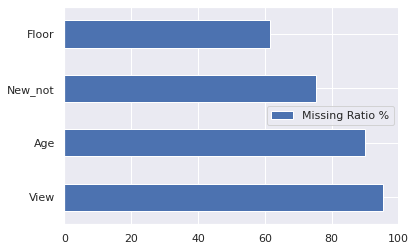

In [433]:

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [434]:
#deleting columns that have huge amount of 'NA':missing values
df.drop(labels = 'Floor', axis = 1, inplace = True)
df.drop(labels = 'Age', axis = 1, inplace = True)
df.drop(labels = 'New_not', axis = 1, inplace = True)
df.drop(labels = 'View', axis = 1, inplace = True)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                623 non-null    object 
 1   Location          623 non-null    object 
 2   Price(TND)        623 non-null    object 
 3   Nb_Room           623 non-null    int64  
 4   Surface(mÂ²)      623 non-null    float64
 5   Garden            623 non-null    int64  
 6   Air_conditioning  623 non-null    int64  
 7   Heating           623 non-null    int64  
 8   Elevator          623 non-null    int64  
 9   Parking_space     623 non-null    int64  
 10  Terrace           623 non-null    int64  
 11  Pool              623 non-null    int64  
 12  Security_system   623 non-null    int64  
 13  Concierge         623 non-null    int64  
 14  Equipped_kitchen  623 non-null    int64  
 15  Oven              623 non-null    int64  
 16  Satellite_dish    623 non-null    int64  
 1

In [436]:
df.head()

Id         Location Price(TND)  \
0  Sell apartment in Les Jardins de Carthage...  Jardin Carthage     740000   
1  Beautiful apartment for sale in Les Jardi...  Jardin Carthage     675000   
2  Sale of a lovely apartment in Les Jardins...  Jardin Carthage     640000   
3  Beautiful apartment for sale in Les Jardi...  Jardin Carthage     550000   
4  Sell apartment in Les Jardins de Carthage...  Jardin Carthage     307000   

   Nb_Room  Surface(mÂ²)  Garden  Air_conditioning  Heating  Elevator  \
0        3         227.0       1                 1        1         1   
1        3         172.0       1                 0        0         0   
2        3         162.0       1                 0        0         0   
3        2         166.0       1                 1        1         1   
4        1          67.0       1                 1        1         1   

   Parking_space  Terrace  Pool  Security_system  Concierge  Equipped_kitchen  \
0              0        1     1                1          1                 1   
1              0        1     0                1          0                 0   
2              0        1     0                1          0                 0   
3              1        1     0                1          1                 1   
4              1        0     0                1          1                 1   

   Oven  Satellite_dish  Box_room  
0     1               1         0  
1     1               0         0  
2     1               0         0  
3     1               0         0  
4     1               1         0

# ***convert price from object to integer***

---



In [437]:
df["Price(TND)"] = df['Price(TND)'].str.replace(',', '')
df["Price(TND)"] = df['Price(TND)'].str.replace(' ', '').astype(int)

In [438]:
df["Price(TND)"] = df['Price(TND)'].astype(int)
df.head()

Id         Location  Price(TND)  \
0  Sell apartment in Les Jardins de Carthage...  Jardin Carthage      740000   
1  Beautiful apartment for sale in Les Jardi...  Jardin Carthage      675000   
2  Sale of a lovely apartment in Les Jardins...  Jardin Carthage      640000   
3  Beautiful apartment for sale in Les Jardi...  Jardin Carthage      550000   
4  Sell apartment in Les Jardins de Carthage...  Jardin Carthage      307000   

   Nb_Room  Surface(mÂ²)  Garden  Air_conditioning  Heating  Elevator  \
0        3         227.0       1                 1        1         1   
1        3         172.0       1                 0        0         0   
2        3         162.0       1                 0        0         0   
3        2         166.0       1                 1        1         1   
4        1          67.0       1                 1        1         1   

   Parking_space  Terrace  Pool  Security_system  Concierge  Equipped_kitchen  \
0              0        1     1                1          1                 1   
1              0        1     0                1          0                 0   
2              0        1     0                1          0                 0   
3              1        1     0                1          1                 1   
4              1        0     0                1          1                 1   

   Oven  Satellite_dish  Box_room  
0     1               1         0  
1     1               0         0  
2     1               0         0  
3     1               0         0  
4     1               1         0

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                623 non-null    object 
 1   Location          623 non-null    object 
 2   Price(TND)        623 non-null    int64  
 3   Nb_Room           623 non-null    int64  
 4   Surface(mÂ²)      623 non-null    float64
 5   Garden            623 non-null    int64  
 6   Air_conditioning  623 non-null    int64  
 7   Heating           623 non-null    int64  
 8   Elevator          623 non-null    int64  
 9   Parking_space     623 non-null    int64  
 10  Terrace           623 non-null    int64  
 11  Pool              623 non-null    int64  
 12  Security_system   623 non-null    int64  
 13  Concierge         623 non-null    int64  
 14  Equipped_kitchen  623 non-null    int64  
 15  Oven              623 non-null    int64  
 16  Satellite_dish    623 non-null    int64  
 1

# ***OUTLIERS***

---



In [440]:
#deleting Id column because we don't need it in the training process : it doesn't affect the price prediction
df.drop(labels = 'Id', axis = 1, inplace = True)

In [441]:
#deleting rows with the values: 14 12 8 7 6
df.drop(df.loc[df['Nb_Room']==14].index, inplace=True)
df.drop(df.loc[df['Nb_Room']==6].index, inplace=True)
df.drop(df.loc[df['Nb_Room']==7].index, inplace=True)
df.drop(df.loc[df['Nb_Room']==8].index, inplace=True)
df.drop(df.loc[df['Nb_Room']==12].index, inplace=True)

# ***encoding categorical Variables (Location)***

In [442]:
df['Location'].value_counts()

 El Mourouj (3)              253
Jardin Carthage              201
Cité El Wahat,Aouina          86
Jardin Aouina,Aouina          52
 El Mourouj (5)                8
 El Mourouj (1)                5
 Farhat Hached,El Mourouj      2
 El Mourouj (3                 1
Name: Location, dtype: int64

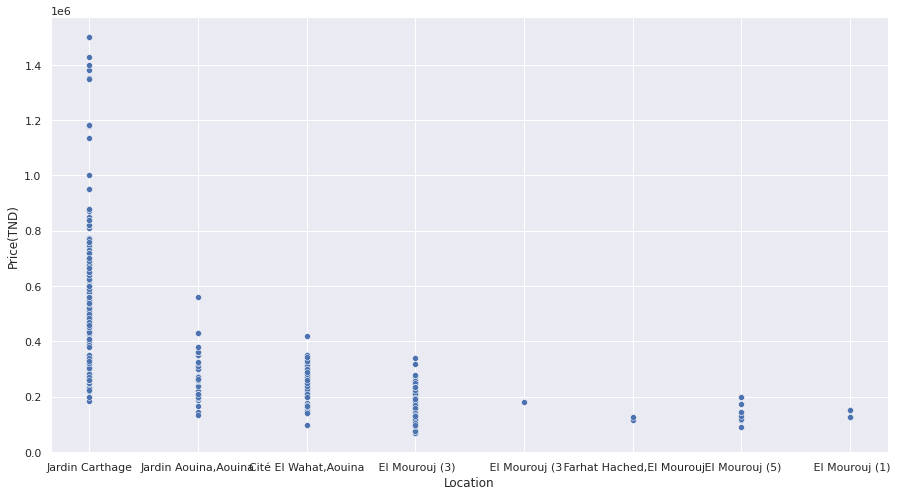

In [443]:
#visualizing Location Values
df['Location'].value_counts()
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x="Location", y="Price(TND)", data=df);
sns.set(rc = {'figure.figsize':(15,8)})

In [444]:
#Label_encoding 
df['Location'].value_counts()
label_encoder = preprocessing.LabelEncoder()
df['Location']= label_encoder.fit_transform(df['Location'])
df['Location'].unique()


array([7, 6, 5, 2, 1, 4, 3, 0])

In [445]:
#minimazing surface values
df['Surface(mÂ²)'] = df['Surface(mÂ²)']/df['Surface(mÂ²)'].max()
df.describe()

Location    Price(TND)     Nb_Room  Surface(mÂ²)      Garden  \
count  608.000000  6.080000e+02  608.000000    608.000000  608.000000   
mean     4.421053  3.157078e+05    2.495066      0.136767    0.328947   
std      2.261420  2.400599e+05    0.953607      0.080711    0.470218   
min      0.000000  7.000000e+04    0.000000      0.024000    0.000000   
25%      2.000000  1.480000e+05    2.000000      0.085750    0.000000   
50%      5.000000  2.230000e+05    3.000000      0.117000    0.000000   
75%      7.000000  4.262500e+05    3.000000      0.162750    1.000000   
max      7.000000  1.500000e+06    5.000000      1.000000    1.000000   

       Air_conditioning     Heating    Elevator  Parking_space     Terrace  \
count        608.000000  608.000000  608.000000     608.000000  608.000000   
mean           0.371711    0.442434    0.317434       0.483553    0.516447   
std            0.483660    0.497084    0.465861       0.500141    0.500141   
min            0.000000    0.000000    0.000000       0.000000    0.000000   
25%            0.000000    0.000000    0.000000       0.000000    0.000000   
50%            0.000000    0.000000    0.000000       0.000000    1.000000   
75%            1.000000    1.000000    1.000000       1.000000    1.000000   
max            1.000000    1.000000    1.000000       1.000000    1.000000   

             Pool  Security_system   Concierge  Equipped_kitchen        Oven  \
count  608.000000       608.000000  608.000000        608.000000  608.000000   
mean     0.011513         0.259868    0.478618          0.348684    0.304276   
std      0.106768         0.438923    0.499954          0.476946    0.460479   
min      0.000000         0.000000    0.000000          0.000000    0.000000   
25%      0.000000         0.000000    0.000000          0.000000    0.000000   
50%      0.000000         0.000000    0.000000          0.000000    0.000000   
75%      0.000000         1.000000    1.000000          1.000000    1.000000   
max      1.000000         1.000000    1.000000          1.000000    1.000000   

       Satellite_dish    Box_room  
count      608.000000  608.000000  
mean         0.077303    0.218750  
std          0.267291    0.413739  
min          0.000000    0.000000  
25%          0.000000    0.000000  
50%          0.000000    0.000000  
75%          0.000000    0.000000  
max          1.000000    1.000000

In [446]:
#drop all 'Na' values
df.dropna()

Location  Price(TND)  Nb_Room  Surface(mÂ²)  Garden  Air_conditioning  \
0           7      740000        3         0.227       1                 1   
1           7      675000        3         0.172       1                 0   
2           7      640000        3         0.162       1                 0   
3           7      550000        2         0.166       1                 1   
4           7      307000        1         0.067       1                 1   
..        ...         ...      ...           ...     ...               ...   
618         2      235000        3         0.110       0                 0   
619         2      135000        2         0.120       0                 0   
620         2      140000        2         0.120       0                 1   
621         2      135000        2         0.100       0                 1   
622         2      130000        4         0.400       0                 0   

     Heating  Elevator  Parking_space  Terrace  Pool  Security_system  \
0          1         1              0        1     1                1   
1          0         0              0        1     0                1   
2          0         0              0        1     0                1   
3          1         1              1        1     0                1   
4          1         1              1        0     0                1   
..       ...       ...            ...      ...   ...              ...   
618        1         0              1        1     0                0   
619        0         0              0        0     0                0   
620        1         1              1        1     0                1   
621        1         0              1        0     0                1   
622        0         0              1        0     0                0   

     Concierge  Equipped_kitchen  Oven  Satellite_dish  Box_room  
0            1                 1     1               1         0  
1            0                 0     1               0         0  
2            0                 0     1               0         0  
3            1                 1     1               0         0  
4            1                 1     1               1         0  
..         ...               ...   ...             ...       ...  
618          0                 0     0               0         1  
619          0                 0     0               0         0  
620          1                 1     1               0         1  
621          1                 0     1               0         0  
622          0                 0     0               0         0  

[608 rows x 17 columns]

# ***correlation matrics ***

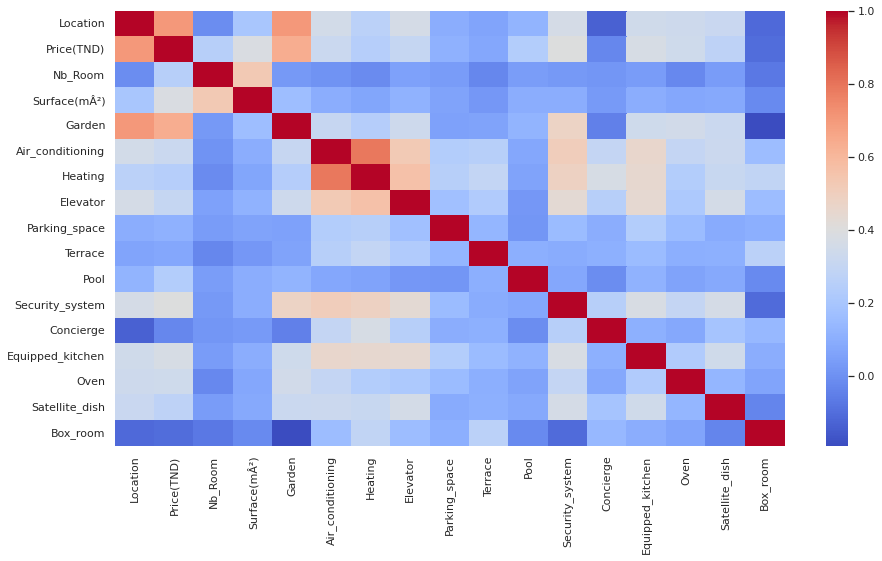

In [447]:
plt.figure()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

#  ***Data visualization***

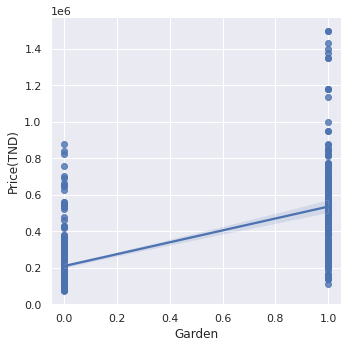

In [448]:
#ploting the relation between Price(TND) and Garden
sns.lmplot(x='Garden', y='Price(TND)', data=df)

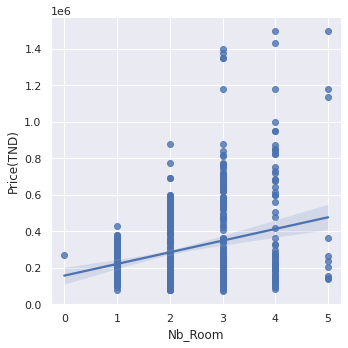

In [449]:
#ploting the relation between Price(TND) and Nb_Room
sns.lmplot(x='Nb_Room', y='Price(TND)', data=df)

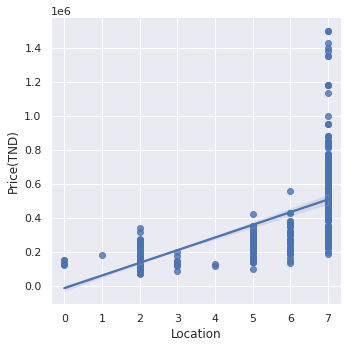

In [450]:
#ploting the relation between Price(TND) and Location
sns.lmplot(x='Location', y='Price(TND)', data=df)

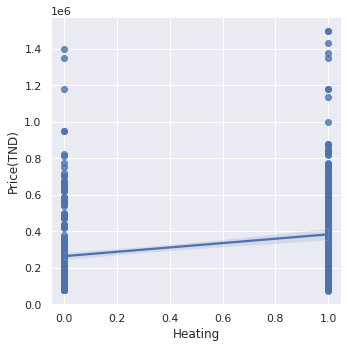

In [451]:
#ploting the relation between Price(TND) and Heating
sns.lmplot(x='Heating', y='Price(TND)', data=df)

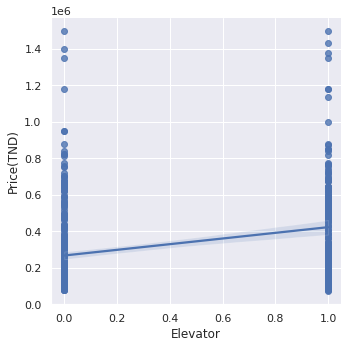

In [452]:
#ploting the relation between Price(TND) and Elevator
sns.lmplot(x='Elevator', y='Price(TND)', data=df)

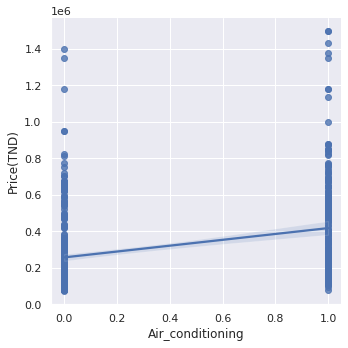

In [453]:
#ploting the relation between Price(TND) and Air_conditioning
sns.lmplot(x='Air_conditioning', y='Price(TND)', data=df)

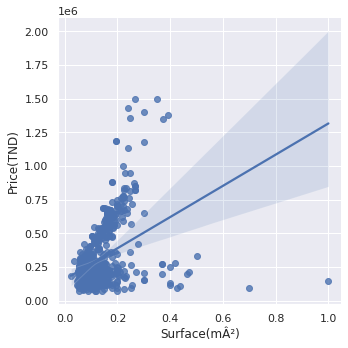

In [454]:
#ploting the relation between Price(TND) and Air_conditioning
sns.lmplot(x='Surface(mÂ²)', y='Price(TND)', data=df)

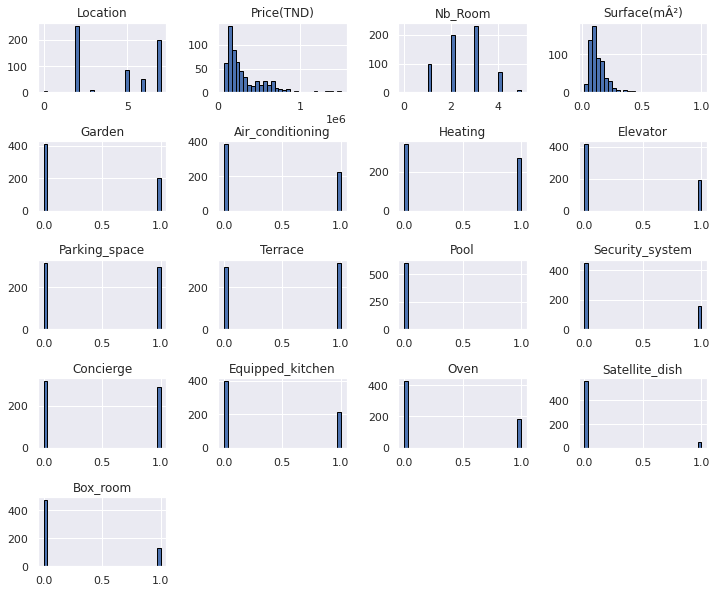

In [455]:
#univariate visualization 
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# ***Models Training algorithms***

In [456]:
#splitting data into X_train, X_test, y_train, y_test
training_data = df
X = training_data.drop(['Price(TND)'], axis = 1)
y = training_data['Price(TND)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(486, 16) (122, 16)
(486,) (122,)


In [457]:
#download the Test data
X_test.to_csv('test.csv',index=False)

# ***Linear regression model***

In [458]:
model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print(accuracy)



0.46510695687242787


In [459]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2



Actual      Predicted
109   340000  355222.381156
10    675000  587797.898508
184   691000  744072.630642
77    684933  605230.232858
550    77000   76821.325231
182   380000  327039.255774
457   175000  104666.921373
227   278000  280478.526207
82   1181500  568194.622145
76    405000  534982.516536

# ***KNeighborsRegressor***

In [460]:

rmse_val = [] #to store rmse values for different k


model = neighbors.KNeighborsRegressor()

model.fit(X_train, y_train)  #fit the model
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))


88790.27375208877
0.868626160002733
138176.49657840145
0.5993478195603426


In [461]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual  Predicted
109   340000   306200.0
10    675000   578800.0
184   691000   484000.0
77    684933   630800.0
550    77000   123800.0
182   380000   414000.0
457   175000   187400.0
227   278000   206000.0
82   1181500   643445.2
76    405000   530800.0

# ***SVR***

In [462]:
# Fit the model over the training data

rmse_val = [] 
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))


265959.04157877306
-0.17871177722250042
243651.38752084307
-0.24576732092310483


In [463]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual      Predicted
109   340000  211169.507245
10    675000  211182.139258
184   691000  211171.782574
77    684933  211179.356651
550    77000  210999.878838
182   380000  211170.551043
457   175000  211008.413993
227   278000  211113.415711
82   1181500  211174.811873
76    405000  211183.478666

# ***RandomForestRegressor***

In [464]:

# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor( )
# Fitting the Random Forest Regression model to the data
model.fit(X_train, y_train) 
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))

36096.20622391803
0.9782879303883874
94518.69545246633
0.8125287849505715


In [465]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual  Predicted
109   340000  318130.00
10    675000  624205.00
184   691000  590492.26
77    684933  575200.00
550    77000  105676.00
182   380000  287660.00
457   175000  177740.00
227   278000  223220.00
82   1181500  737470.00
76    405000  367955.00

# ***DecisionTreeRegressor***

In [466]:
rmse_val = [] #to store rmse values for different k
model = DecisionTreeRegressor(random_state = 0)
# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train) 
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))

5696.664728247845
0.9994592214900362
88320.27645742733
0.8363108113567267


In [467]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual  Predicted
109   340000   331000.0
10    675000   600000.0
184   691000   691000.0
77    684933   614000.0
550    77000    85000.0
182   380000   340000.0
457   175000   230000.0
227   278000   215000.0
82   1181500  1181500.0
76    405000   399000.0

# ***the decision tree structure***

In [468]:

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(model, out_file ='tree_structure.dot', 
feature_names =['Location	Price(TND)','Satellite_dish','Box_room','Nb_Room','Surface(mÂ²)','Garden','Air_conditioning','Heating','Elevator','Parking_space','Terrace','Pool','Security_system','Concierge','Equipped_kitchen','Oven']) 


# ***download the Prediction.csv file***

In [469]:
y_test.to_csv('prediction.csv',index=False)

# ***XGBRegressor***

In [470]:

# Necessary imports

# Instantiation
model = xg.XGBRegressor()
 
# Fitting the model
model.fit(X_train, y_train)
 
# Predict the model
pred = model.predict(X_train)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred))
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))

[14:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
57390.73628660665
0.9451139853270787
91739.47102897875
0.8233914927530608


In [471]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual      Predicted
109   340000  282218.125000
10    675000  614764.562500
184   691000  602082.750000
77    684933  604352.750000
550    77000  141111.109375
182   380000  308452.312500
457   175000  149552.015625
227   278000  226008.265625
82   1181500  711234.937500
76    405000  393805.812500

In [472]:
#scaling the Data for Tuning the Alpha value in the Ridge Algorithm
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
linridge.intercept_
linridge.coef_

array([214819.64607371, 154370.1432058 ,  84100.48155366, 134546.21102686,
        15161.01409068, -14008.04129982,  -3369.71974995,    907.79460656,
         -990.84717836,  72193.45114077,  49969.69481688,  -3600.61279225,
        53697.07976983,  57048.73673602,  14317.83390777, -15579.93840488])

# ***Tuning the Alpha value to maximize training and test scores***

In [473]:
linridge.score(X_train_scaled, y_train)
linridge.score(X_test_scaled, y_test)
(np.sum(linridge.coef_ != 0))
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled,y_train) 
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 16, r-squared training: 0.68, r-squared test: 0.47

Alpha = 1.00
num abs(coeff) > 1.0: 16, r-squared training: 0.68, r-squared test: 0.47

Alpha = 10.00
num abs(coeff) > 1.0: 16, r-squared training: 0.66, r-squared test: 0.48

Alpha = 20.00
num abs(coeff) > 1.0: 16, r-squared training: 0.63, r-squared test: 0.48

Alpha = 50.00
num abs(coeff) > 1.0: 16, r-squared training: 0.58, r-squared test: 0.46

Alpha = 100.00
num abs(coeff) > 1.0: 16, r-squared training: 0.52, r-squared test: 0.43

Alpha = 1000.00
num abs(coeff) > 1.0: 16, r-squared training: 0.21, r-squared test: 0.19



In [474]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual      Predicted
109   340000  282218.125000
10    675000  614764.562500
184   691000  602082.750000
77    684933  604352.750000
550    77000  141111.109375
182   380000  308452.312500
457   175000  149552.015625
227   278000  226008.265625
82   1181500  711234.937500
76    405000  393805.812500

# ***RIDGE***

In [475]:
model = Ridge(alpha=0.01)
model.fit(X_train, y_train) 
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))

138260.49422090285
0.6814524169247069
159648.99198924305
0.4651505937669972


In [476]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual      Predicted
109   340000  355232.926722
10    675000  587838.051801
184   691000  743501.157344
77    684933  605396.554761
550    77000   76845.065092
182   380000  327038.671122
457   175000  104641.861074
227   278000  280464.168345
82   1181500  568174.472958
76    405000  535165.778842

# ***Ridge via CROSS VALIDATION***

In [477]:

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, X_train, y_train,
    return_estimator=True, n_jobs=2)

In [478]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.157


# ***Lasso regression***

In [479]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train) 
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
print(r2_score(y_train, pred_train_model))

pred_test_model= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model))) 
print(r2_score(y_test, pred_test_model))

138260.4224590369
0.6814527475985288
159655.4716658468
0.4651071770003624


In [480]:
#compare actual output values with predicted values
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

Actual      Predicted
109   340000  355222.426150
10    675000  587798.034551
184   691000  744071.675536
77    684933  605230.509857
550    77000   76821.374748
182   380000  327039.292801
457   175000  104667.051060
227   278000  280478.422582
82   1181500  568194.601699
76    405000  534982.773899

# ***create a table with all the algorithms to compare results***

In [481]:
#create a Ml model for regresor.
ml_algo = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    XGBRegressor(),
    KNeighborsRegressor(),
    Ridge(),
    Lasso()
]
# run the model and save the accuracy in the dataframe
ml_columns = ['MLAlgo Name', 'MLAlgo Parameters','MLAlgo Train MAE', 'MLAlgo Test MAE','MLAlgo Train R2','MLAlgo Test R2','MLAlgo Train RMSE','MLAlgo Test RMSE', 'MLAlgo Time']
ml_algo_compare = pd.DataFrame(columns = ml_columns)

#create table to compare MLA predictions
ml_algo_predict = pd.DataFrame(y_train.copy().values, columns=['Actual Sales'])
# targets
# ml_algo_predict
# targets
# from sklearn.model_selection import train_test_split
# X_train,X_test, y_train, y_test = train_test_split(trn_data, targets, test_size=0.05, random_state=42)
row_index=0
for alg in ml_algo:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    ml_algo_compare.loc[row_index, 'MLAlgo Name'] = MLA_name
    ml_algo_compare.loc[row_index, 'MLAlgo Parameters'] = str(alg.get_params())
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = cross_validate(alg, X_train, y_train, scoring= 'neg_mean_absolute_error',cv = 3, return_train_score=True)
    cv_results1 = cross_validate(alg, X_train, y_train, scoring= 'r2',cv = 3, return_train_score=True)
    cv_results2 = cross_validate(alg, X_train, y_train, scoring= 'neg_mean_squared_error',cv = 3, return_train_score=True)
#     print(cv_results)
    ml_algo_compare.loc[row_index, 'MLAlgo Time'] = cv_results['fit_time'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Train MAE'] = cv_results['train_score'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Test MAE'] = cv_results['test_score'].mean() 
    ml_algo_compare.loc[row_index, 'MLAlgo Train R2'] = cv_results1['train_score'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Test R2'] = cv_results1['test_score'].mean() 
    ml_algo_compare.loc[row_index, 'MLAlgo Train RMSE'] = cv_results2['train_score'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Test RMSE'] = cv_results2['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets  
    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    ml_algo_predict[MLA_name] = alg.predict(X_train)
    row_index += 1
    
# take a care on ml_algo_model
ml_algo_compare

[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

MLAlgo Name                                  MLAlgo Parameters  \
0       LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
1  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3                    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4           XGBRegressor  {'base_score': 0.5, 'booster': 'gbtree', 'cols...   
5    KNeighborsRegressor  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
6                  Ridge  {'alpha': 1.0, 'copy_X': True, 'fit_intercept'...   
7                  Lasso  {'alpha': 1.0, 'copy_X': True, 'fit_intercept'...   

  MLAlgo Train MAE MLAlgo Test MAE MLAlgo Train R2 MLAlgo Test R2  \
0    -95253.684549  -102569.658997         0.68935       0.588435   
1      -650.205761   -79152.674897        0.999618       0.717069   
2    -23145.868012   -63022.816543        0.978197       0.834833   
3   -164769.666275   -165198.68824       -0.166184      -0.173219   
4    -38690.431464   -64827.421441        0.956316       0.818014   
5    -57122.939095    -70386.43786        0.862223       0.794815   
6     -96326.80156  -102785.973326        0.685213       0.614758   
7     -95254.17689  -102565.172543         0.68935       0.588501   

    MLAlgo Train RMSE    MLAlgo Test RMSE MLAlgo Time  
0  -18448692698.74472 -24084581343.614079    0.015197  
1     -23556584.36214 -15374127033.234568    0.004707  
2  -1287173073.990446  -9470406095.473427    0.371931  
3  -69925275523.75647 -70037887219.581253    0.022964  
4  -2575190643.140359 -10662023085.126211    0.126155  
5  -8268644399.472922 -12473688400.187654     0.00756  
6 -18711949714.369961  -22780631836.40213     0.01697  
7 -18448693169.948063 -24080480107.453175    0.007217

In [482]:
ml_algo_predict.sample(10)

Actual Sales  LinearRegression  DecisionTreeRegressor  \
386        115000     223898.227588               115000.0   
277        145000     132747.406048               145000.0   
75         114000     182230.387517               114000.0   
254        145000      87381.473095               145000.0   
350        140000     136858.273521               140000.0   
285        256000     105117.984897               256000.0   
471        570000     540948.589742               570000.0   
79         140000     457879.380512               140000.0   
388        205000     318909.428934               205000.0   
329        550000     512544.029894               550000.0   

     RandomForestRegressor            SVR   XGBRegressor  KNeighborsRegressor  \
386          139100.000000  211007.423918  166407.453125             151000.0   
277          148408.333333  211001.430272  156226.546875             124400.0   
75           129090.000000  211007.654718  140214.656250             150400.0   
254          147306.000000  210999.411073  149859.703125             130000.0   
350          142040.000000  211001.339632  147986.890625             168800.0   
285          214250.000000  210999.284990  161026.234375             160000.0   
471          657585.000000  211174.885206  669447.937500             488000.0   
79           176820.000000  211107.900287  221781.781250             257000.0   
388          222616.666667  211147.274874  226865.312500             320600.0   
329          542440.000000  211174.118177  558573.000000             501045.2   

             Ridge          Lasso  
386  223830.758803  223898.588043  
277  138285.941250  132767.256058  
75   189307.711882  182235.033566  
254   91833.031713   87387.764612  
350  147578.827553  136859.935129  
285  103404.334368  105109.838959  
471  527083.908049  540932.775245  
79   465697.658331  457904.591938  
388  316748.112924  318916.982314  
329  507195.785117  512528.878622

# ***Neural networks : Tensorflow data processing and model training***

In [483]:
"""
  Standard Scale test and train data
  Z - Score normalization
  """
standard_scaler = StandardScaler()
def scale_datasets(X_train, X_test):
   x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X_train),
      columns=X_train.columns
    )
   x_test_scaled = pd.DataFrame(
      standard_scaler.transform(X_test),
      columns = X_test.columns
   )
   return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)

In [484]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [485]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
7/7 [==============================] - 2s 70ms/step - loss: 96.4653 - mean_squared_logarithmic_error: 88.4542 - val_loss: 40.3670 - val_mean_squared_logarithmic_error: 40.4673
Epoch 2/20
7/7 [==============================] - 0s 20ms/step - loss: 29.4321 - mean_squared_logarithmic_error: 27.8011 - val_loss: 17.9912 - val_mean_squared_logarithmic_error: 18.0459
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 14.1556 - mean_squared_logarithmic_error: 14.0837 - val_loss: 10.1447 - val_mean_squared_logarithmic_error: 10.1793
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 8.3595 - mean_squared_logarithmic_error: 7.8013 - val_loss: 6.5108 - val_mean_squared_logarithmic_error: 6.5381
Epoch 5/20
7/7 [==============================] - 0s 21ms/step - loss: 5.4674 - mean_squared_logarithmic_error: 5.6229 - val_loss: 4.5579 - val_mean_squared_logarithmic_error: 4.5789
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 3.

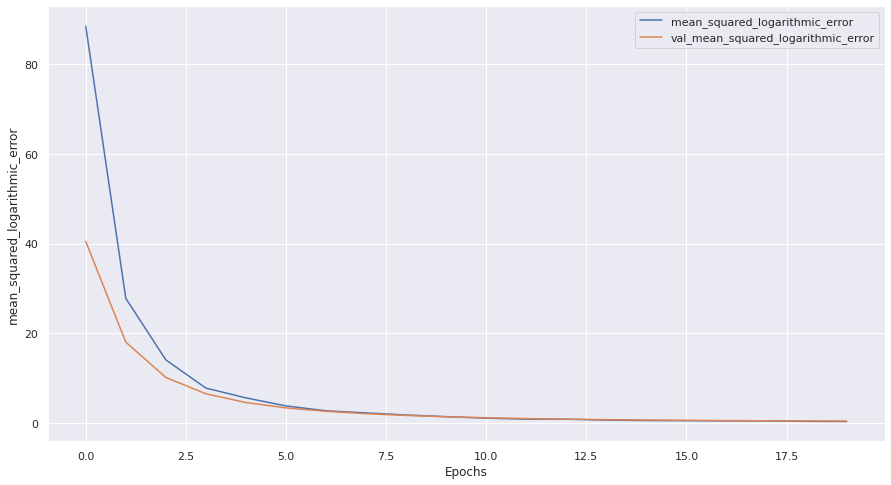

In [486]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

## *when the epochs increase the MSLE decrease and when the validation MSLE and the validation MSLE are aligned .*

# ***show tensorflow predicted results***

In [487]:
X_test['prediction'] = model.predict(x_test_scaled)
X_test.head()

Location  Nb_Room  Surface(mÂ²)  Garden  Air_conditioning  Heating  \
109         7        1       0.08000       1                 1        1   
10          7        3       0.17200       1                 1        1   
184         7        2       0.14487       0                 1        1   
77          7        4       0.15400       1                 1        1   
550         2        2       0.07000       0                 0        0   

     Elevator  Parking_space  Terrace  Pool  Security_system  Concierge  \
109         0              0        0     0                0          0   
10          1              0        1     0                1          1   
184         0              1        1     1                0          0   
77          1              1        1     0                0          0   
550         0              0        0     0                0          0   

     Equipped_kitchen  Oven  Satellite_dish  Box_room     prediction  
109                 0     0               0         0  128471.835938  
10                  1     0               1         0  335861.468750  
184                 1     1               0         1  286404.312500  
77                  1     1               0         0  332601.843750  
550                 0     0               0         0  242178.890625

MAE: 154456.4009989754
MSE: 53813938439.93344
RMSE: 231978.31458981987
VarScore: 0.16793575420857454


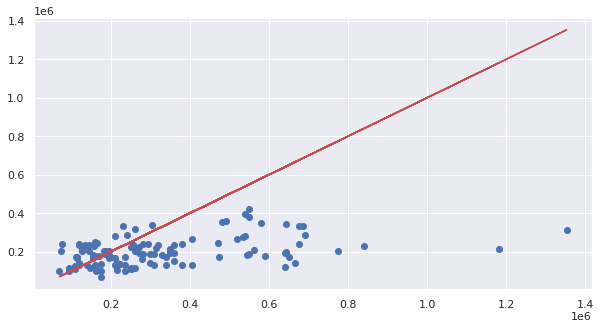

In [488]:
y_pred = model.predict(x_test_scaled)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')